# Student’s Academic Performance Analysis
### Panagiotis Maroulidis A.M.: 37
### Georgina Skraparli A.M.: 31

## Analysis

**Paper used:** Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

**Dataset:** datasets_436_920_xAPI-Edu-Data.csv (https://www.kaggle.com/aljarah/xAPI-Edu-Data)

In this paper, there is a proposal about a new student’s performance prediction model based on data mining techniques with the 10 filter-based highest ranked features in which new data attributes/features were included that are called student’s behavioral features (student's and parents' interaction with e-learning management system). The classifiers that were used are: Artificial Neural Network, Naïve Bayesian and Decision tree with ensemble methods (Bagging, Boosting and Random Forest (RF)). According to the paper's results there is a strong relationship between learner’s behaviors and their academic achievement.

There aren't any missing values in the dataset.

In the following analysis we used the following techniques:
- **Logistic Regression** with student’s behavioral features to classify student's academic achievement
- **Support Vector Machine** with student’s behavioral features to classify student's academic achievement
- **Decision Tree** with student’s behavioral features to classify student's academic achievement
- **Random Forest** with student’s behavioral features to classify student's academic achievement
- **Decision Tree with Boosting (Adaboost)** with student’s behavioral features to classify student's academic achievement

**Import libraries**

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Read file**

In [3]:
# Read from file
df = pd.read_csv("datasets_436_920_xAPI-Edu-Data.csv") 

**Convert categorical data to numbers**  
<br/>(student’s behavioral features & student's academic achievement)

In [4]:
# Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Bad’,’Good’)
df = df.replace({'ParentschoolSatisfaction': {'Bad': 0, 'Good': 1}})

#  Parent Answering Survey- parent answered the surveys which are provided from school or not
# (nominal:’Yes’,’No’)
df = df.replace({'ParentAnsweringSurvey': {'No': 0, 'Yes': 1}})

# Class- student's academic achievement (nominal: L, M, H)
df = df.replace({'Class': {'L': 0, 'M': 1, 'H': 2}})


**Data normalization**
<br/>(student’s behavioral features that need normalization)

In [14]:
# Normalize function
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

# Behavioral features
df['Discussion']= normalize(df['Discussion'])
df['VisITedResources'] = normalize(df['VisITedResources'])
df['raisedhands'] = normalize(df['raisedhands'])
df['AnnouncementsView'] = normalize(df['AnnouncementsView'])

**Create training and feature**

In [6]:
feature_cols = ['Discussion','VisITedResources', 'raisedhands', 'AnnouncementsView', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction']
X = df[feature_cols]
y = df['Class']

**Split data**

In [7]:
#By default, the test_size is 25% and train_size is 75%
# We defined random_state = 3 in order to have reproducable results
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3) 

## Logistic Regression
Classification using Logistic Regression with Multinomial distribution to predict student's academic achievement from student’s behavioral features

In [8]:
# We assumed that the data ara balanced and used Logistic Regression without weights
parameters = {'l1_ratio':np.arange(0.1,1.0,0.1)}
clf = GridSearchCV(LogisticRegression(
                                        random_state=0, multi_class = 'multinomial', solver = 'saga', penalty = 'elasticnet',
                                     ),
                    parameters, cv=5,n_jobs = -1, iid = False)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
print ("Τhe optimized parameters with 5- fold cross validation are:", clf.best_params_)
# Evaluation Measures
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="weighted"))    
print("Precision test: ",precision_score(y_test, predict, average="weighted"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="weighted"))
print("F1-measure test: ",f1_score(y_test, predict, average="weighted"))


Τhe optimized parameters with 5- fold cross validation are: {'l1_ratio': 0.9}
Accuracy test:  0.6166666666666667
Recall test:  0.6166666666666667
Precision test:  0.6236029545478857
F1-measure train:  0.6729646028667112
F1-measure test:  0.6169307613991212


In [9]:
ddf = pd.read_csv("datasets_436_920_xAPI-Edu-Data.csv")
ddf["Class"]
from collections import Counter
class_count = Counter(ddf['Class'])
classes = {"L" : class_count["L"], "M" : class_count["M"], "H" : class_count["H"]}
print (classes)

{'L': 127, 'M': 211, 'H': 142}


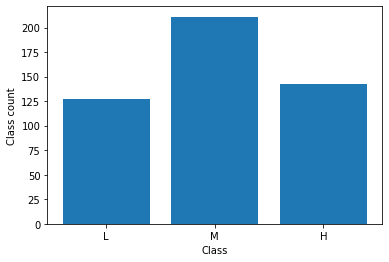

In [10]:
# Barchart
plt.bar(classes.keys(),classes.values()) 
plt.xlabel('Class') 
plt.ylabel('Class count') 
plt.show()

In [11]:
# Input x: list or 1d numpy array
# Output: transformation using Softmax function
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

**We observed that the classes are a bit imbalanced so we will try to put weights on the classes**

In [15]:
# Softmax
# We faced underflow because we used exp function and parsed big values. We addressed this problem by dividing its element
# of the list by the sum of the list
class_weights = softmax(np.array(list(classes.values()))/np.sum(np.array(list(classes.values()))))
# Use weights or not (balanced)
# Normalized X data
# penalty = 'elasticnet' is l1 and l2 regularization
# Steps:
# 1: Tried without weights, 
# 2: Then use weights and test accuracy was higher. We chose to have weights because of the imbalanced dataset
# 3: We observed that there is a gap between train and test accuracy which indicates overfitting. Thus we chose to use 
#    elasticnet regularization which is l1 and l2 combined.
parameters = {'l1_ratio':np.arange(0.1,1.0,0.1)}
clf = GridSearchCV(LogisticRegression(
                                        random_state=0, multi_class = 'multinomial', solver = 'saga', penalty = 'elasticnet',
                                        class_weight = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
                                     ),
                    parameters, cv=5,n_jobs = -1, iid = False)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict = clf.predict(X_test)
# We find the best hyper parameter
print ("Τhe optimized parameters with 5- fold cross validation are:", clf.best_params_)
# Evaluation Measures
# We used these metrics from the paper. Especially the F1-measure is suitable for imbalanced classes. That's why we 
# used it as our main evaluation metric. We measured train and test f1 score to observe the trade off between bias-variance
# (ie To see if the model is overfitting)
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="weighted"))    
print("Precision test: ",precision_score(y_test, predict, average="weighted"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="weighted"))
print("F1-measure test: ",f1_score(y_test, predict, average="weighted"))


Τhe optimized parameters with 5- fold cross validation are: {'l1_ratio': 0.9}
Accuracy test:  0.5916666666666667
Recall test:  0.5916666666666667
Precision test:  0.5994043342911878
F1-measure train:  0.6489172809522301
F1-measure test:  0.593996743996744


## Support Vector Machine
Support Vector Machine with student’s behavioral features to classify student's academic achievement

In [122]:
# Support Vector Machine convex optimization function, it will find global minimum
# Compared linear, 3rd degree polynomial and rbf which uses Gaussian distributions and C which is the
# regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly 
# positive. The penalty is a squared l2 penalty.
# Despite the fact that the optimal parameter for kernel is 'linear' which indicates the problem is "easily" solved
# we observed that we cannot get high accuracy, which probably indicates that the problem is no further solvable

parameters = {'C': np.arange(0.1,1.0,0.1),'kernel': ['linear', 'poly', 'rbf']}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(SVC(), parameters, cv=5,n_jobs = -1, iid = False)

clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
# Evaluation Measures
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="weighted"))    
print("Precision test: ",precision_score(y_test, predict, average="weighted"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="weighted"))
print("F1-measure test: ",f1_score(y_test, predict, average="weighted"))
print ("Τhe optimized parameters with 5- fold cross validation are:", clf.best_params_) 


Accuracy test:  0.5833333333333334
Recall test:  0.5833333333333334
Precision test:  0.5918059593023256
F1-measure train:  0.6870309451302905
F1-measure test:  0.5811250870952364
Τhe optimized parameters with 5- fold cross validation are: {'C': 0.9, 'kernel': 'linear'}


## Decision Tree
Decision tree with student’s behavioral features to classify student's academic achievement

**Decision Tree**

In [123]:
parameters = {'max_depth':range(3,20)}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, error_score=np.nan, iid=False)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print ("Mean cross-validated score of the best_estimator:",clf.best_score_)
print ("Τhe optimized maximum depth of the tree with 5- fold cross validation:", clf.best_params_) 

Mean cross-validated score of the best_estimator: 0.6499288213546366
Τhe optimized maximum depth of the tree with 5- fold cross validation: {'max_depth': 4}


**Evaluation Measures**

In [124]:
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="weighted"))    
print("Precision test: ",precision_score(y_test, predict, average="weighted"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="weighted"))
print("F1-measure test: ",f1_score(y_test, predict, average="weighted"))

Accuracy test:  0.575
Recall test:  0.575
Precision test:  0.5798227969348659
F1-measure train:  0.755654092571076
F1-measure test:  0.5766416017104175


**Tree model image**

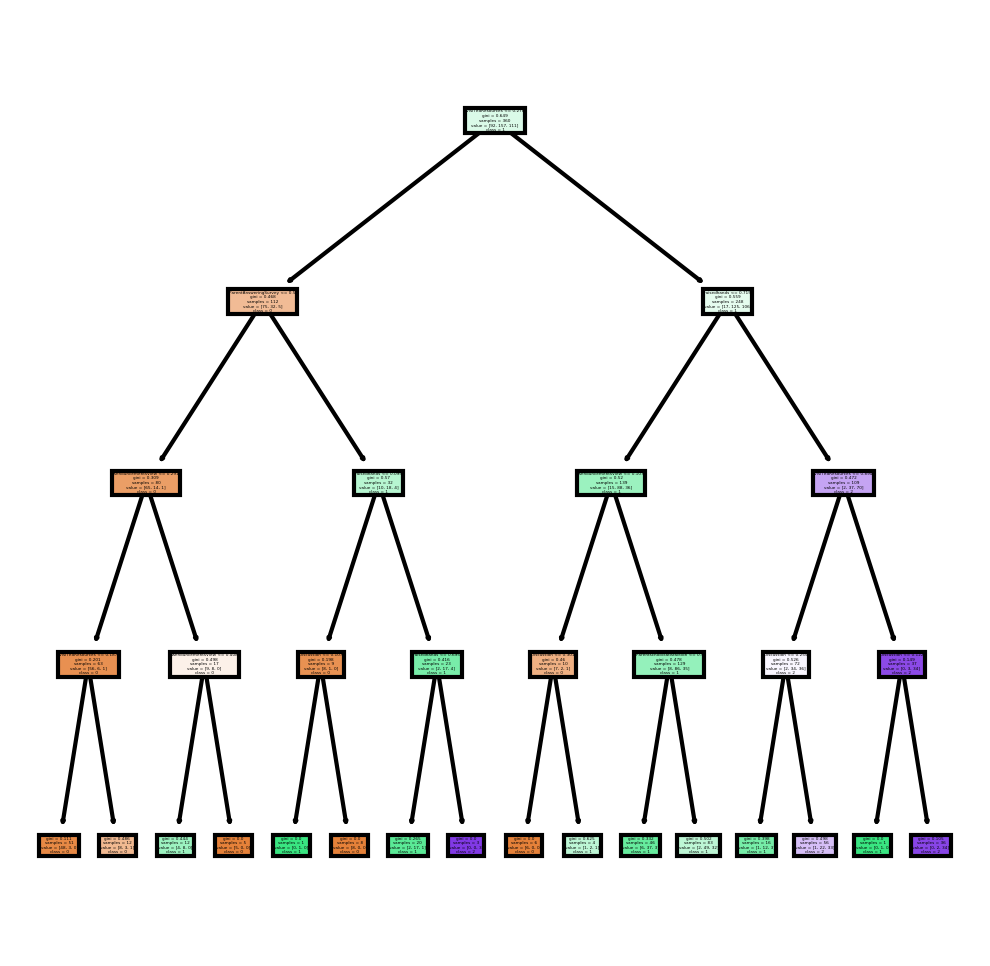

In [125]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_model,
               feature_names = feature_cols, 
               class_names= ['0', '1','2'],
               filled = True);
fig.savefig('SimpleDT.png')

## After using a decision tree, we'll use more powerful classifiers that belongs to ensemble methods. 

## Random Forest (Bagging + Decision tree)

In [13]:
# We used RandomForestClassifier to see the importance of each feature.
# It uses information gain to show how much information each feature has.
# Belongs to bagging ensemble algorithm. Bagging + decision tree. It uses as weak classifiers the decision trees
parameters = {'n_estimators': range(100,250,10)}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(RandomForestClassifier(), parameters, iid = 'False')

clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict = clf.predict(X_test)

# Evaluation Measures
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="weighted"))    
print("Precision test: ",precision_score(y_test, predict, average="weighted"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="weighted"))
print("F1-measure test: ",f1_score(y_test, predict, average="weighted"))
print ("Τhe optimized parameters with 5- fold cross validation are:", clf.best_params_) 


Accuracy test:  0.6083333333333333
Recall test:  0.6083333333333333
Precision test:  0.6209396597554492
F1-measure train:  0.994440373885441
F1-measure test:  0.6129851004851005
Τhe optimized parameters with 5- fold cross validation are: {'n_estimators': 150}


### We can see that Random forest is overfiting but on the other hand we can see that it has better test evaluation thus it is our choice if we will consider the gap between f1 training and test score is important in our problem.

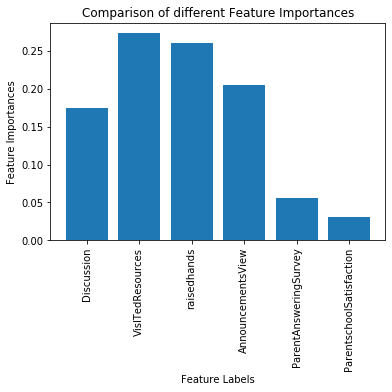

In [128]:
clf2 = RandomForestClassifier(n_estimators = clf.best_params_["n_estimators"])
clf2.fit(X_train, y_train)
predict_train = clf2.predict(X_train)
predict = clf2.predict(X_test)
feature_importance = clf2.feature_importances_
plt.bar(X_train.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)
plt.title('Comparison of different Feature Importances') 
plt.show() 

**Decision Tree with Boosting (Adaboost)** 

In [129]:
# Belongs to boosting ensemble methods.
# n_estimators = number of trees as a weak classifier
# learning rate : shrinks the contribution of each weak classifier by learning_rate

parameters = {'n_estimators':range(100,200,10),'learning_rate':np.arange(0.1,1.0,0.1)}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(AdaBoostClassifier(base_estimator = DecisionTreeClassifier()), parameters, cv=5,n_jobs = -1, iid = False)

clf.fit(X_train, y_train)

print ("Mean cross-validated score of the best_estimator:",clf.best_score_)
print ("Τhe parameters with 5- fold cross validation are:", clf.best_params_) 

Mean cross-validated score of the best_estimator: 0.6802232871497776
Τhe parameters with 5- fold cross validation are: {'learning_rate': 0.2, 'n_estimators': 130}


**Evaluation Measures**

In [130]:
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="weighted"))    
print("Precision test: ",precision_score(y_test, predict, average="weighted"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="weighted"))
print("F1-measure test: ",f1_score(y_test, predict, average="weighted"))

Accuracy test:  0.6
Recall test:  0.6
Precision test:  0.6165307738400958
F1-measure train:  0.994440373885441
F1-measure test:  0.6049614880367092


## PCA

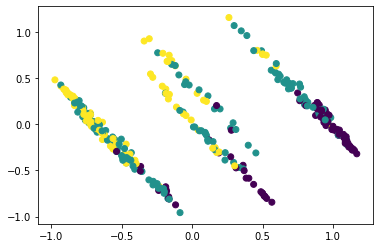

In [131]:
# We do dimensionality reduction using principal component analysis with X components (2 or 3)
# We can observe that on lower dimensions data cannot be easily distinguised.
# In this problem we cannot achieve high generalization score (F1 score on test set)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
plt.scatter(x = principalComponents[:,0],y = principalComponents[:,1],c = y_train)

With a quick look using PCA with 2 components we can see that some of the points cannot be distinguised between two of the three classes. Some observations overlap with each other.

## Final Conclusions

**Classificasion Method Accuracy:**
<br/>

<table style="width:80%">
<tr>
<th>LR(without weights)</th>
<th>LR(with weights)</th>
<th>SVM</th>
<th>DT</th>
<th>RF</th>
<th>DT(Adaboost)</th>
</tr>

<tr>
<td>61.7%</td>
<td>59.2%</td>
<td>58.3%</td>
<td>57.5%</td>
<td>60.8%</td>
<td>60%</td>
</tr>
</table>

*LR: Logistic Regression <br/>
*SVM: Support Vector Machine <br/>
*DT: Decidion Tree <br/>
*RF: Random Forest <br/>


- The highest accuracy was reached with Logistic Regression without weights (61.7%).

- From Random Forest we concluded that the most importanτ feature is visited resources as mentioned in the paper too.

- From PCA's scatterplot we can see that some observations overlap with each other so this prevents the classifiers to reach higher accuracy.

- The results of all of the above classifications' evaluation measures, in which only the student’s behavioral features are used, are better than using the 10 highest ranked features without behavioral features and worse than using all of the 10 highest ranked features as presented in the paper.

<br/>Paper's results:
 <img src="BF-WBF.png" width ="700" height=600 > 

<br/>
- No one of the above classifiers can reach the classifiers with ensemble methods' accuracy from the paper.
<br/>Paper's results:
 <img src="ensembleM.png" width ="700" height=600 > 